# NEURAL NETWORK

ON Polynomial dataset

Importing modules

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

User defined functions 

In [2]:
'''scales the matrix by mean normalizing'''
def mscale(mat):
    mmean= np.mean(mat,axis=0)
    mstddev=np.std(mat,axis=0)
    p= (mat-mmean)/mstddev
    m=mat[:,0].size
    u=np.ones((m,1))
    return np.concatenate((u,p),axis=1)

'''reverses the above process'''
    
def mdesacle(original_mat,mat):
    mmean= np.mean(original_mat,axis=0)
    mstddev=np.std(original_mat,axis=0)
    return ((mat)*mstddev)+mmean

'''de mean normalizes the vector'''

def vdescale(original_vect, vect):
    vmean= np.mean(original_vect)
    vstddev=np.std(original_vect)
    return (vect*vstddev)+vmean

'''gets the average'''
def average(v):                                    #made nice functions for the use of average and range finding
    s=sum(v)
    m=v.size
    return s/m

'''gets the range'''
def rangee(v):
    r=v.max()-v.min()
    return r


'''scales the vector by mean normalizing '''
def scale(v):
    avg=average(v)
    r=np.std(v)             
    u=np.ones(m).reshape(m,1)
    f=(u*avg)
    scaled= (v-f)*(1/r)
    return scaled


'''gets the degre one terms'''
def degree_1(initial_matrix, matrix , list_of_degree):
    global X
    for i in list_of_degree:
        X=np.concatenate((initial_matrix,matrix**i),axis=1)
        initial_matrix=X
       

'''concatenates alll the degree two terms into the initial matrix'''
    
def degree_2(matrix):
    m,n=matrix.shape
    P=np.hsplit(matrix,n)
    for i in range(n):
        for j in range(i,n):
            matrix=np.concatenate((matrix,(P[i])*(P[j])),axis=1)
    return matrix
 
'''concatenates alll the degree three terms into the initial matrix'''

def degree_3(latest_matrix,initial_matrix):
    m,n=initial_matrix.shape
    P=np.hsplit(initial_matrix,n)
    for i in range(n):
        for j in range(i,n):
            for z in range(j,n):
                latest_matrix=np.concatenate((latest_matrix,P[i]*P[j]*P[z]),axis=1)
    return latest_matrix
 
'''concatenates alll the degree four terms into the initial matrix'''

def degree_4(latest_matrix,initial_matrix):
    m,n=initial_matrix.shape
    P=np.hsplit(initial_matrix,n)
    for i in range(n):
        for j in range(n):
            for z in range(n):
                for k in range (n):
                    latest_matrix=np.concatenate((latest_matrix,P[i]*P[j]*P[z]*P[k]),axis=1)

                    
# def degree_compiled (listOfDegrees, initmat):
#     for i in list_of_degree:
#         if i==2:
#             degree_2(mat)
#         if i==3:
#             degree_3(mat)
#         if i==4:
#             degree_4(mat)
            
        
        
        
'''returns the sigmoid'''       
def sigmoid (input):
    return 1/(1+np.exp(-input))


'''random parameters'''

def parameters(L_next,L_current):
    #dimension = L_next*L_current                            
    epsilon = 0.12
    theta= - epsilon + np.random.rand(L_next, L_current) * 2 * epsilon
    return theta
    
'''returns the cost'''   
def cost(theta1,theta2,X_train,Y,lamba=0):         #forward propagation
    m,n=X_train.shape
    u=np.ones((m,1))
#     X_train=np.concatenate((u,X_train),axis=1)
    a1 = X_train    #m*n
    z2 = a1@(theta1.T)  #  m,n  @  n,hiddensize
    a2 = sigmoid(z2) # m x hidden_layer
    a2 = np.concatenate((u,a2),axis=1)   
    z3 = a2@(theta2.T)    
    a3 = z3
    h_x = a3
    J=J = (1/2*m)*np.sum((h_x-Y)**2)
    return J,h_x
 
    
'''back propagation in order to get the gradient of the parameters'''
def back_prop(theta1,theta2,X,Y):
    
    A1 = X       # m,785
    Z2 = A1@theta1.T      # mx hidden_layer_size == m x 784
    A2 = sigmoid(Z2)      #  m x hidden_layer_size == mx 784
    m,n=X.shape
    u=np.ones((m,1))
    A2 = np.concatenate((u,A2),axis=1)
    Z3 = A2@theta2.T         #m x num_labels == m x 26
    A3 = Z3
    h_x = A3                  #m,26
    DELTA3 = A3 - Y
    m,n=(DELTA3@theta2).shape
    DELTA2 = (DELTA3@theta2)*(np.concatenate((np.ones((m,1)),siggrad(Z2)),axis=1))    #m,525    *
    DELTA2 = DELTA2[:,1:]
    theta1_grad = (1/m) * (DELTA2.T @ A1)
    theta2_grad = (1/m) * (DELTA3.T @ A2)
    return theta1_grad,theta2_grad


'''loops run to optimise the value of theta'''
def grad_descent(theta1,theta2,X,Y):
    alpha=0.001
    for i in range(200):
        theta1_grad,theta2_grad=back_prop(theta1,theta2,X,Y)
        theta2=theta2-theta2_grad*alpha
        theta1=theta1-theta1_grad*alpha
        J,h_x=cost(theta1,theta2,X,Y)
        plt.scatter(i,J)
        print(J)


    return theta1,theta2,h_x

'''gradient of the sigmoid is returned'''   
def siggrad(z):
    g=np.zeros((z.shape))
    g=sigmoid(z)*(1-sigmoid(z))
    return g



'''on the new test data it gives us the desired output'''
def predict(theta1,theta2,X):
#     X=X/255
    m,n=X.shape
    u=np.ones((m,1))
    a1 = X    #m*n
    z2 = a1@(theta1.T)  #  m,n  @  n,hiddensize
    a2 = sigmoid(z2) # m x hidden_layer
    a2 = np.concatenate((u,a2),axis=1)   
    z3 = a2@(theta2.T)    
    a3 = z3
    h_x = a3
    return (h_x)
    


In [3]:
s=input("enter the file dorectory/ name if in the same directory")
print("uploading a  csv file that is appropriate for linear regression.......")

X=pd.read_csv(s)   #load the training data

# n=int(input("enter the number of features....."))

X=X.to_numpy()    #converting to numpy
i=len(X[0])       #finding the number of features
m=X[:,0].size   
y=X[:,i-1].reshape((m,1))
X=np.delete(X,i-1,axis=1) 
n=i-1                       #n is number of features
u=np.ones((m,1))            #vector of ones then p.
mean=np.mean(X,axis=1).reshape((m,1))
std=np.std(X,axis=1).reshape((m,1))
X=(X-mean)/std

enter the file dorectory/ name if in the same directoryPolynomial_train.csv
uploading a  csv file that is appropriate for linear regression.......


In [4]:
X_degree2=degree_2(X)
X_final=degree_3(X_degree2,X)
X_final=mscale(X_final)

In [25]:
theta1=parameters(20,20)
theta2=parameters(1,21)
theta1_grad = np.zeros(theta1.shape)
theta2_grad = np.zeros(theta2.shape)

72707947053875.9
72705692144509.14
72702549015884.52
72697802070785.92
72690482931463.81
72679284067888.31
72662556529852.36
72638452787482.34
72605203266069.14
72561384727189.52
72506045048942.78
72438721393714.47
72359433329638.0
72268634192046.75
72167105533700.6
72055859786510.45
71936114441542.08
71809293577539.27
71676953358837.22
71540612350676.14
71401581104204.34
71260882427077.14
71119264770940.69
70977259369719.11
70835240922120.98
70693475848644.97
70552156444028.6
70411423929093.16
70271383800884.836
70132116094003.74
69993682327984.22
69856130291203.95
69719497396654.49
69583813080445.28
69449100547590.96
69315378064844.5
69182659933711.45
69050957233855.305
68920278399036.445
68790629669082.39
68662015448807.7
68534438596180.94
68407900656042.234
68282402051445.01
68157942241672.63
68034519853790.61
67912132792991.21
67790778335797.15
67670453209300.75
67551153658940.87
67432875506804.69
67315614202045.11
67199364864696.28
67084122323928.33
66969881151591.78
668566356917

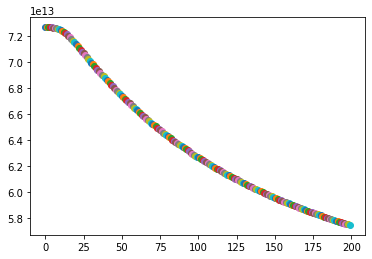

In [26]:
theta1,theta2,h_x=grad_descent(theta1,theta2,X_final,y)

In [7]:
X.shape

(50000, 3)

In [27]:
# (np.mean((h_x-y)**2))**0.5
s=input("enter the file dorectory/ name if in the same directory")
print("uploading a  csv file that is appropriate for linear regression.......")

X=pd.read_csv(s)   #load the training data

# n=int(input("enter the number of features....."))

X=X.to_numpy()    #converting to numpy
i=len(X[0])       #finding the number of features
m=X[:,0].size   
y_test=X[:,i-1].reshape((m,1))
X=np.delete(X,i-1,axis=1) 
n=i-1                       #n is number of features
u=np.ones((m,1))            #vector of ones then p.
mean=np.mean(X,axis=1).reshape((m,1))
std=np.std(X,axis=1).reshape((m,1))
X=(X-mean)/std
# X=np.concatenate((u,X),axis=1)
X_degree2=degree_2(X)
X_final_test=degree_3(X_degree2,X)
X_final=mscale(X_final_test)
X_final_test=np.concatenate((u,X_final_test),axis=1)


enter the file dorectory/ name if in the same directoryPolynomial_test.csv
uploading a  csv file that is appropriate for linear regression.......


In [28]:
y_test_pred=predict(theta1,theta2,X_final_test)

In [29]:
(np.mean((y_test_pred-y)**2))**0.5

1073.6682238291169